In [1]:
j='4.1_4'
dir_data = 'Data_4.1_4'
dir_data = 'Data'
visualize = True
show = True
saveSVG = False

import os
import datetime 
date = datetime.date.today().strftime("%d%m%Y")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
dir_data = os.path.abspath(os.path.join(parent_dir, os.pardir))+f'/{dir_data}/'
sys.path.append(parent_dir+'/functions/')

from usefull_functions import *
from functions import *
from plot_functions import *
from preprocess_functions import *


from equalize_distributions import *

In [2]:
dir_plots = os.path.abspath(os.path.join(parent_dir, os.pardir))+f'/_sample_{j}_{date}/'
folderExists(dir_plots)
settings =        (dir_plots,show,saveSVG)

n = 5000
k={}
k['4_old']= subsample_k(pickle_load('k_raw4_dict',dir_data )['k'],n).reset_index(drop = True)
k['4.1_old']= subsample_k(pickle_load('k_raw4.1_dict',dir_data )['k'],n).reset_index(drop = True)
names = {}
names['4'] = pickle_load('k4_names_dict',dir_data )
names['4.1'] = pickle_load('k4.1_names_dict',dir_data )



# NamesAll = dict['NamesAll']
# CellIden = dict['CellIden']
# EpiCols = dict['EpiCols']
# Core = dict['Core']



The new directory is created!
k_raw4_dict ; loaded from file
original size: 374890, new size: 5000
k_raw4.1_dict ; loaded from file
original size: 110463, new size: 5000
k4_names_dict ; loaded from file
k4.1_names_dict ; loaded from file


In [3]:



# k['4_new1'] = fit1(k['4'].copy(),k['4.1'].copy())

k['4'] , k['4.1'] = fit_distributions(k['4_old'].copy(),k['4.1_old'].copy())
# k['4.1 '] = k['4.1'].copy()
print(len(k['4'] ))
kk=k.copy()
for i, K in kk.items():
    if i=='4' or i=='4.1':
        k[i+'arcsin'] = arcsinh_transform(K.copy())
        print ('k' + i,'; arcsinh transformed')


# mu, std = norm.fit(k['4'])
# h

original size: 5000, new size: 5000
5000
5000
5000
k4 ; arcsinh transformed
k4.1 ; arcsinh transformed


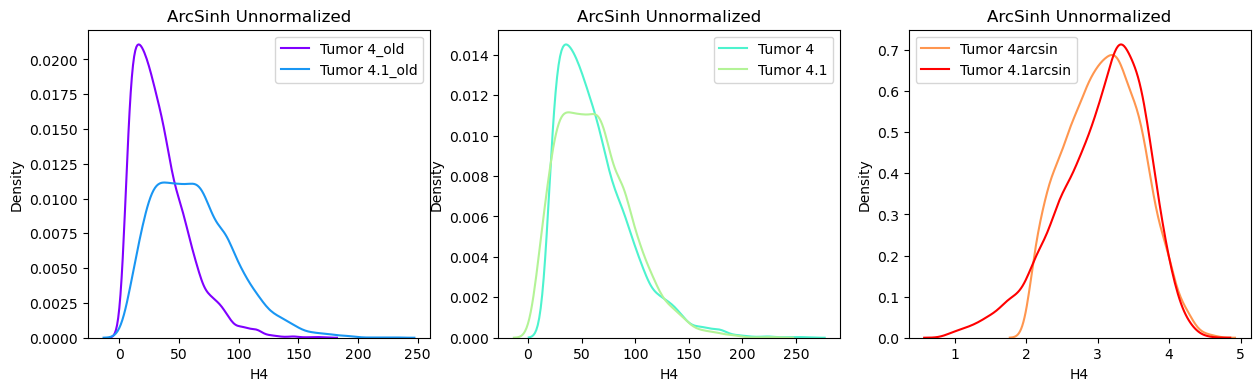

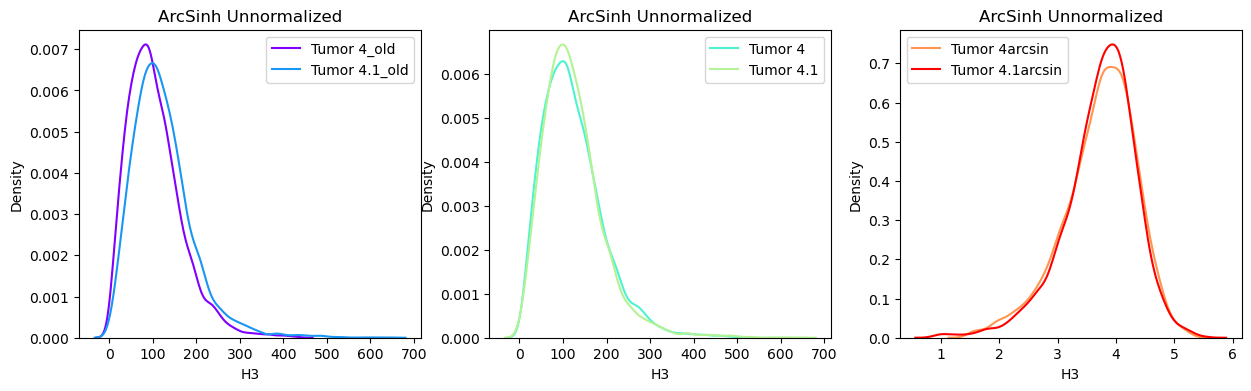

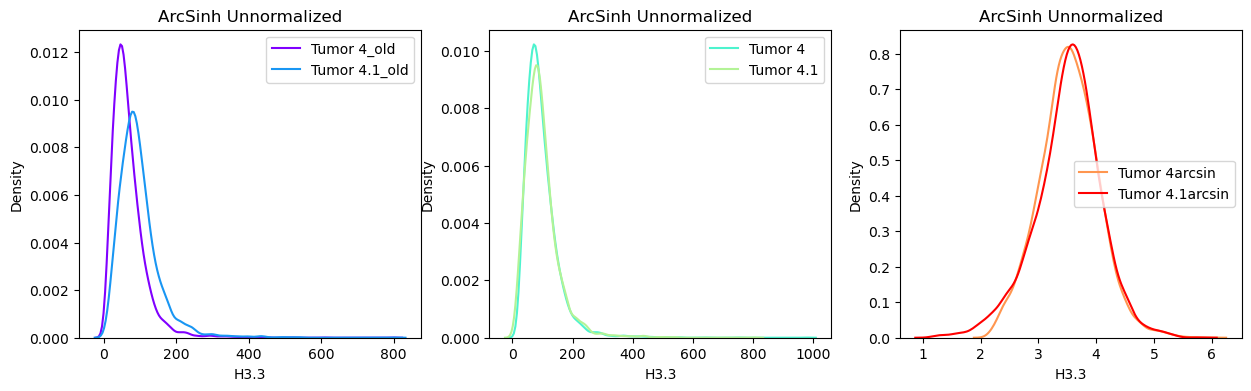

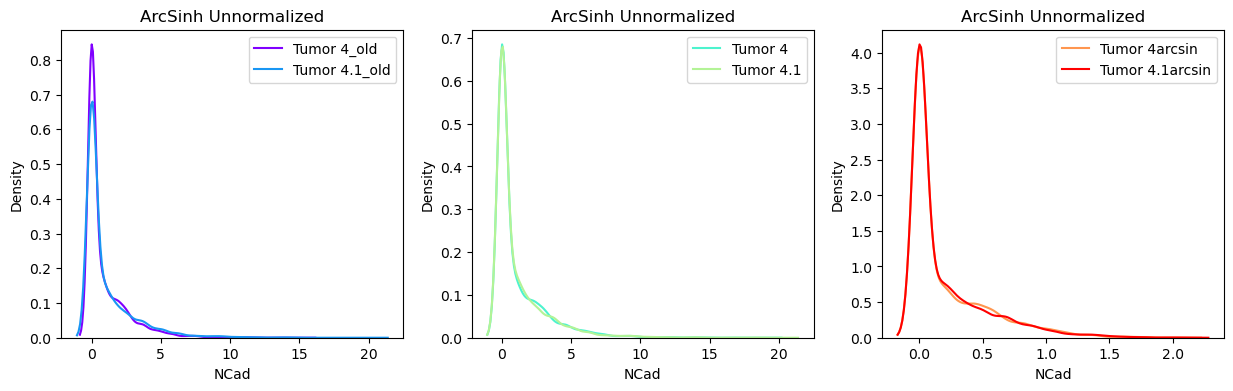

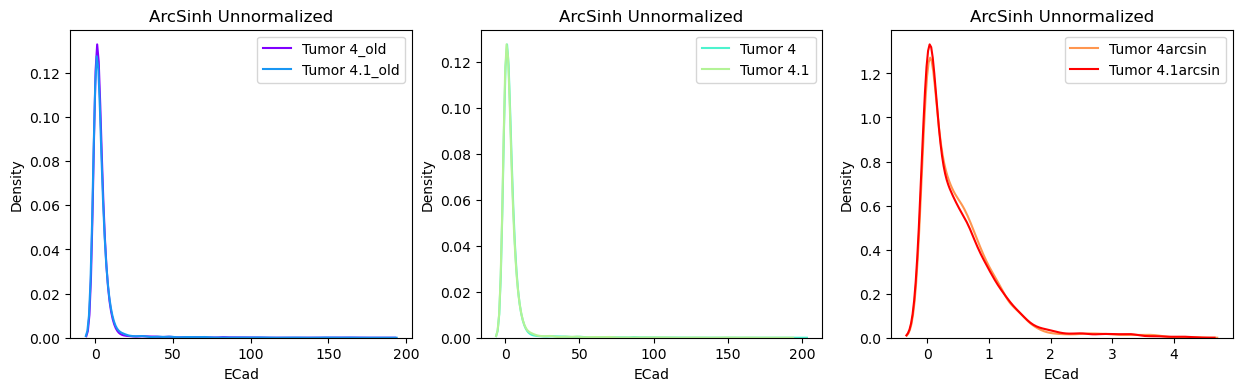

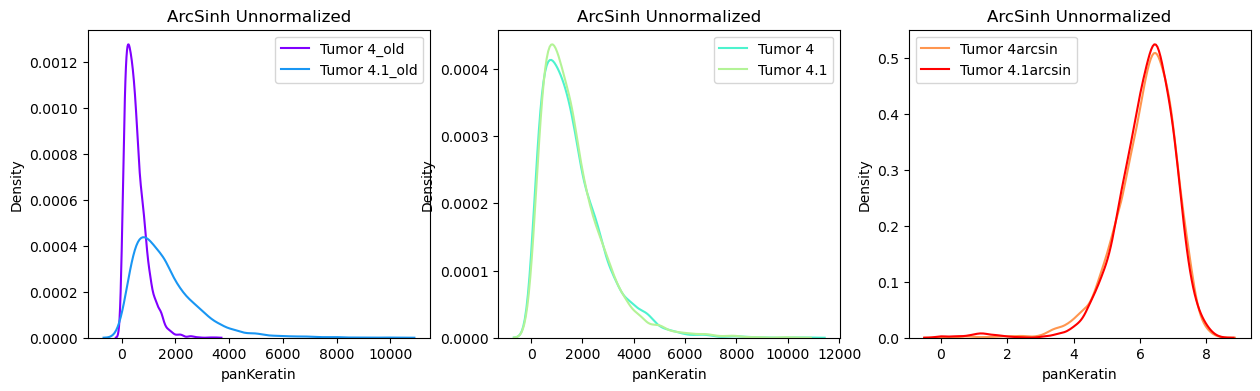

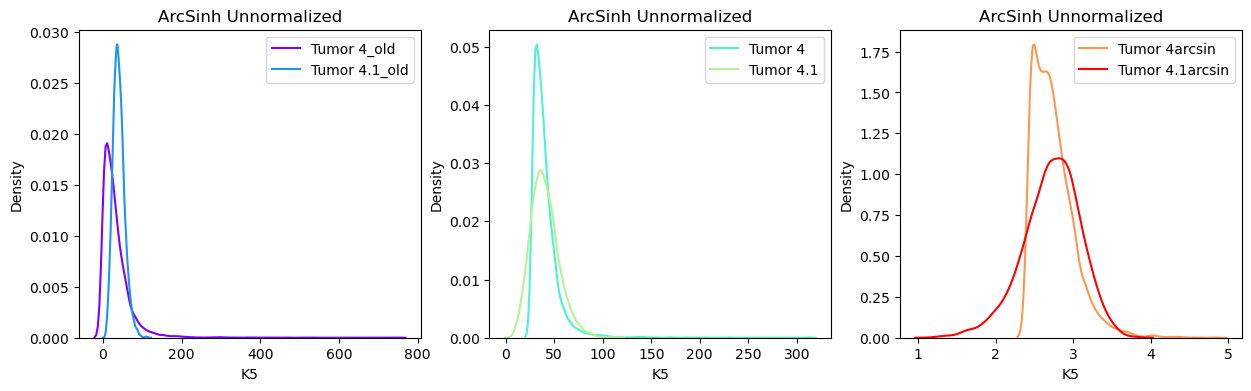

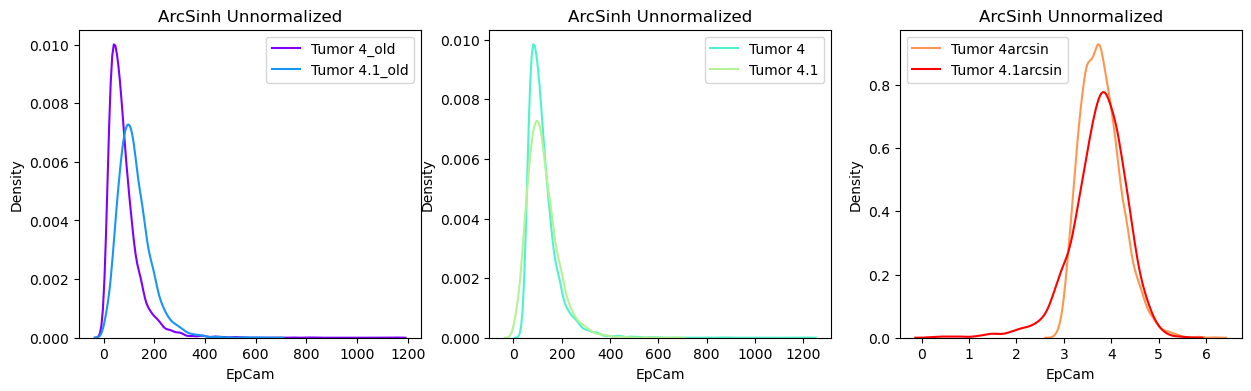

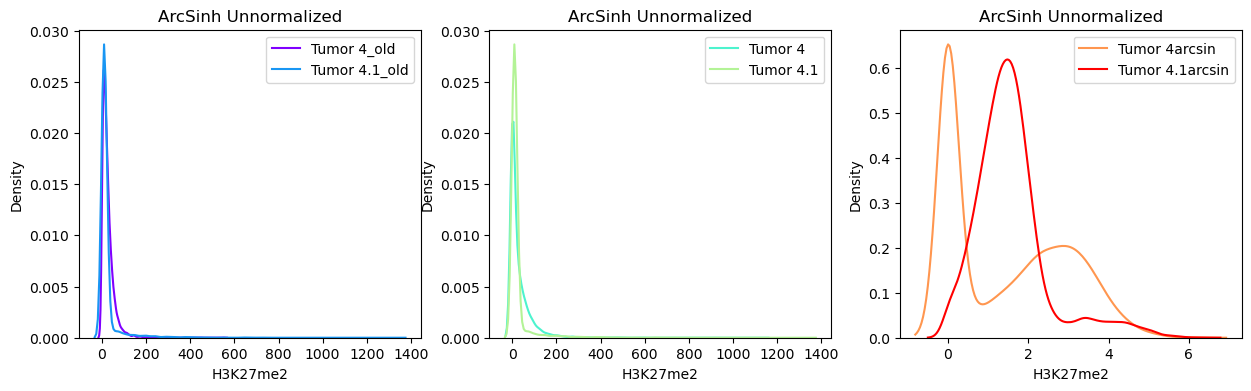

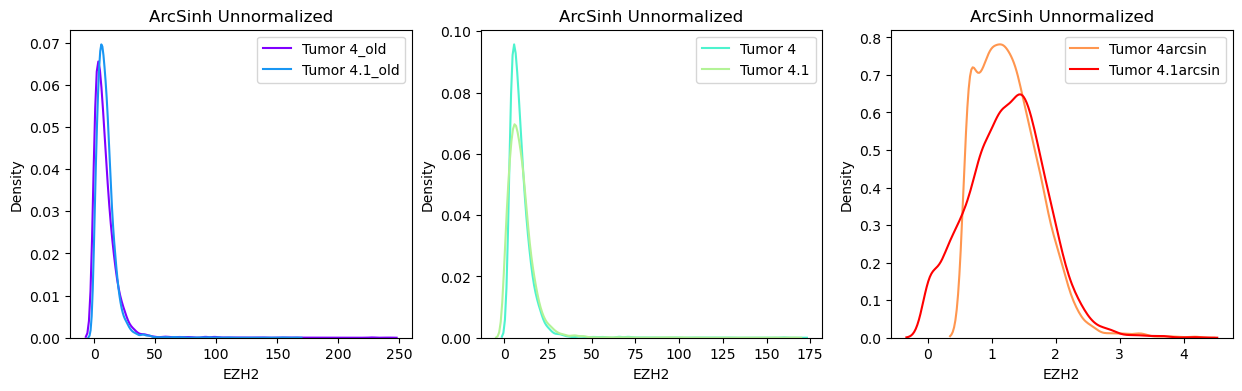

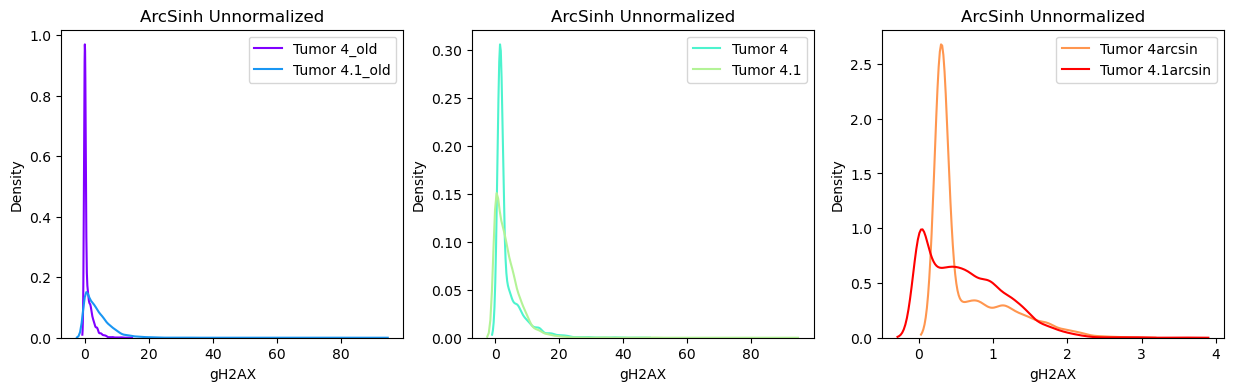

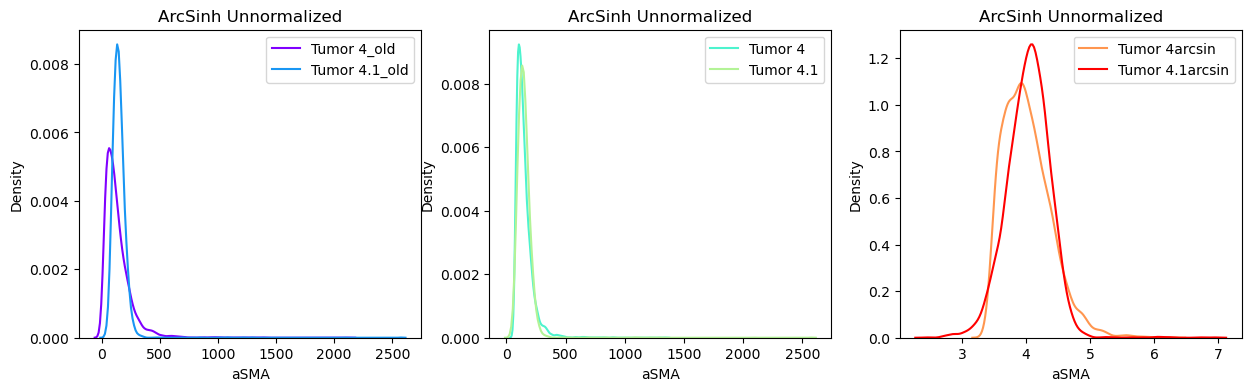

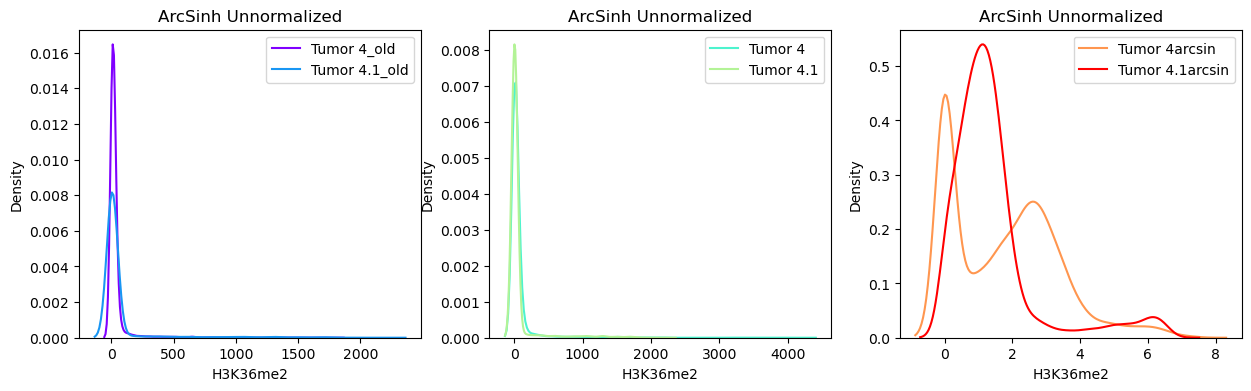

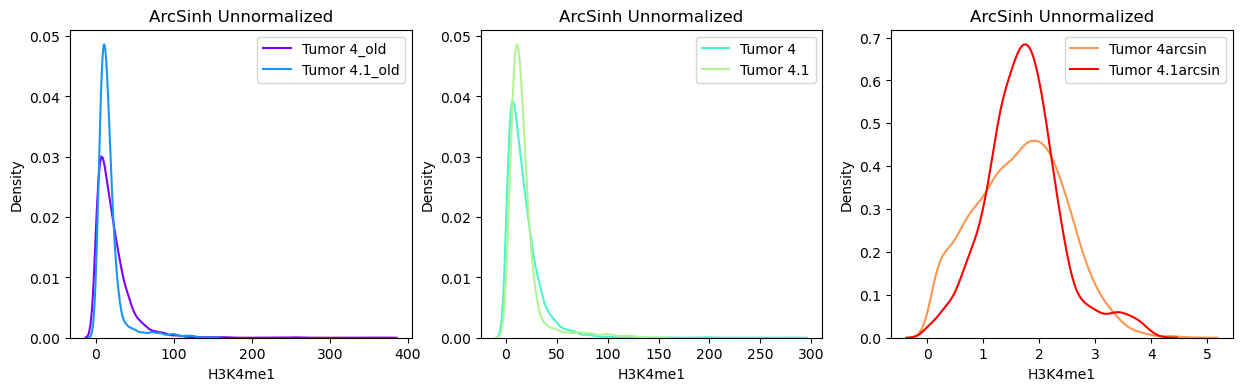

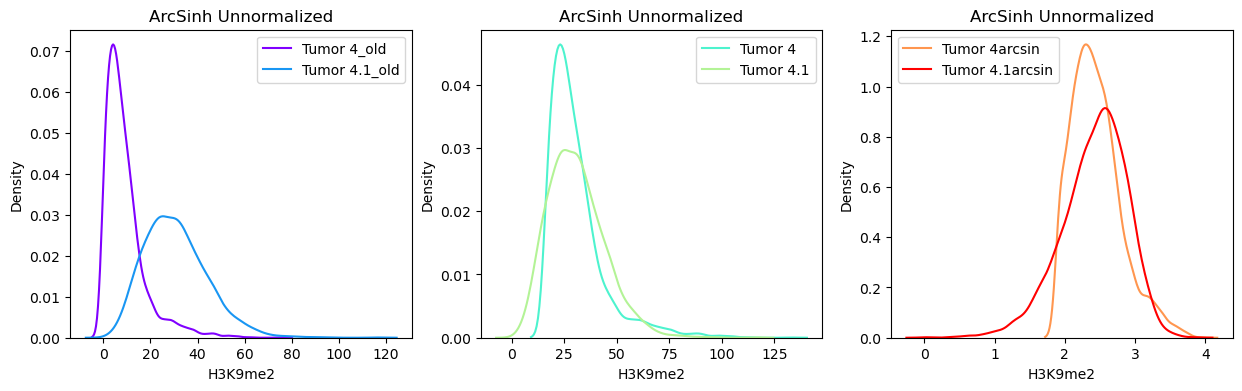

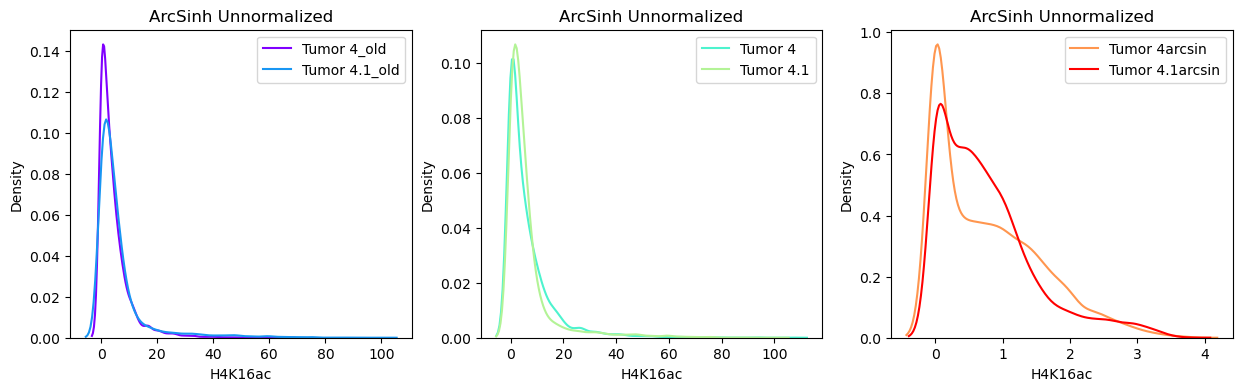

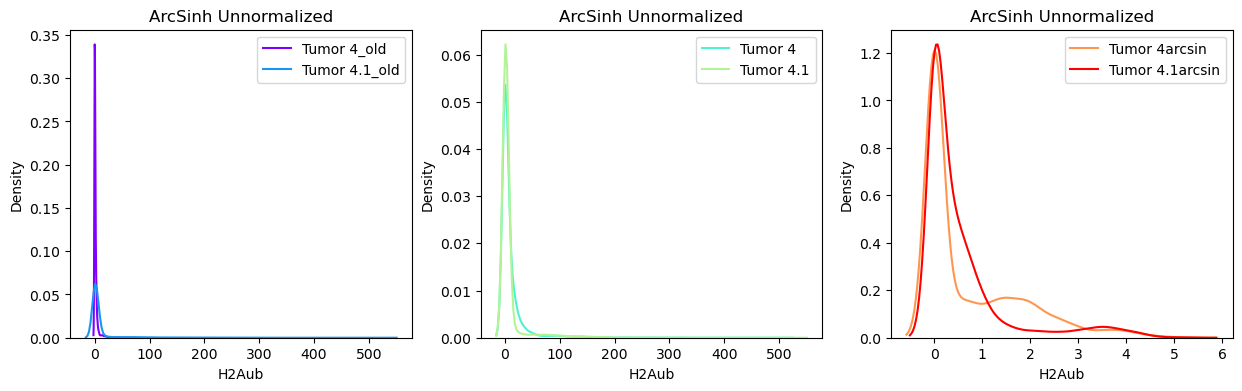

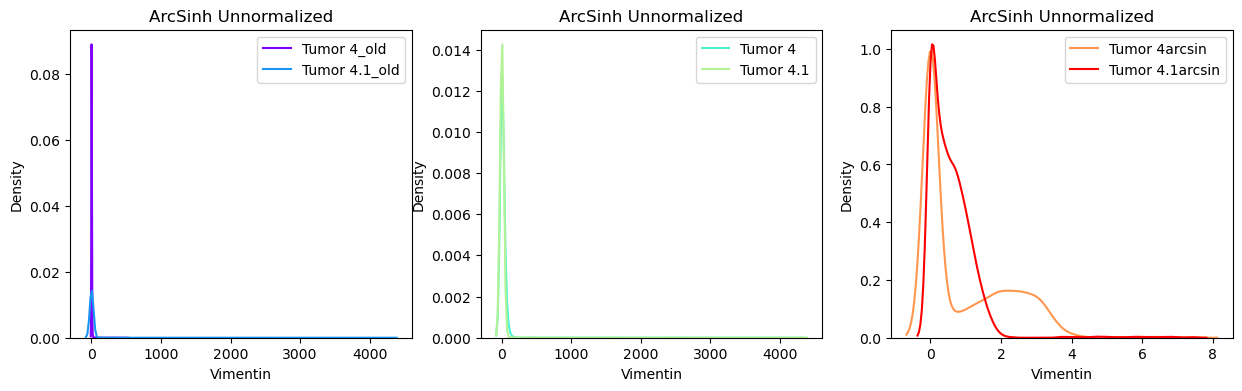

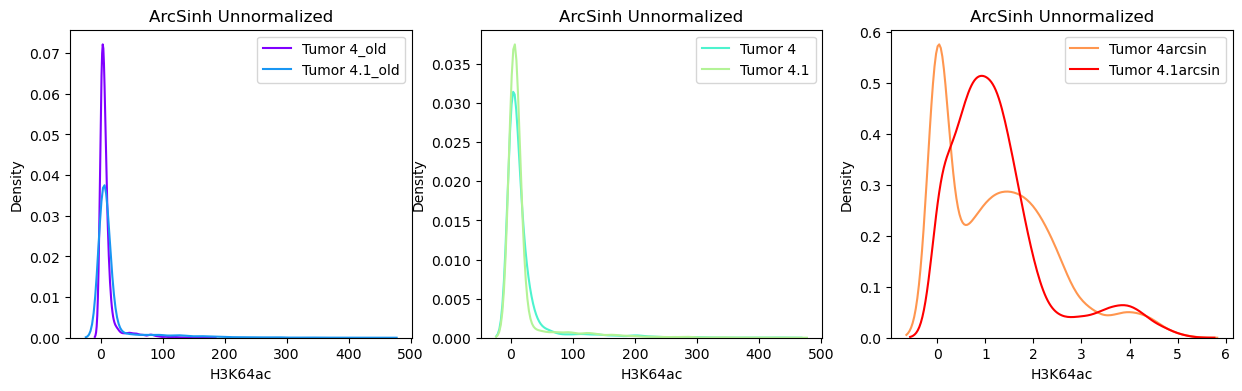

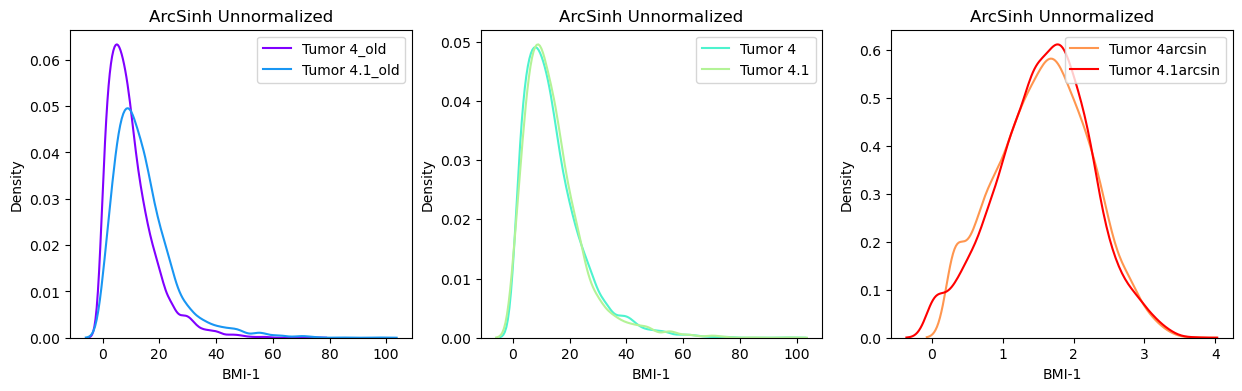

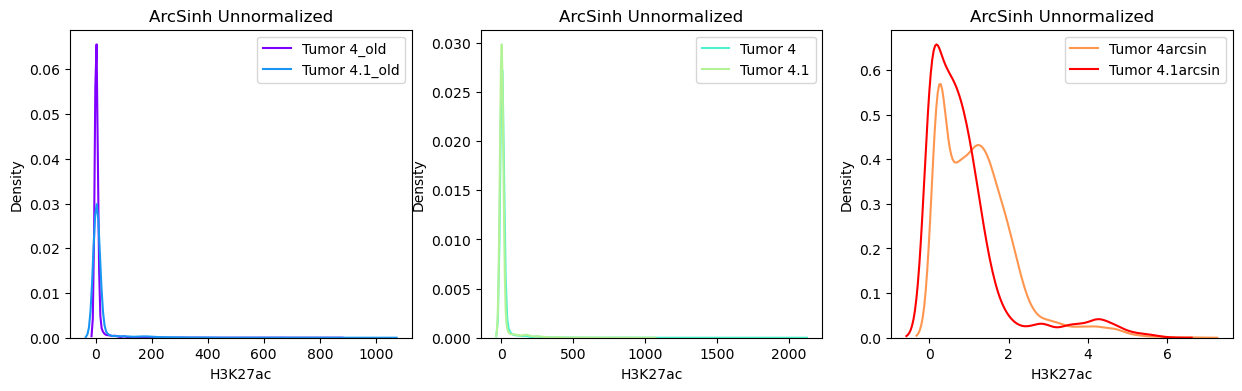

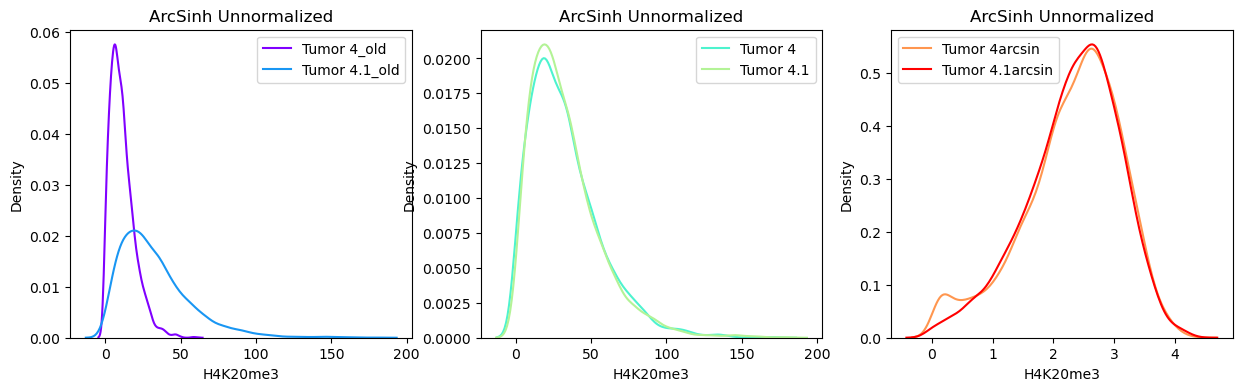

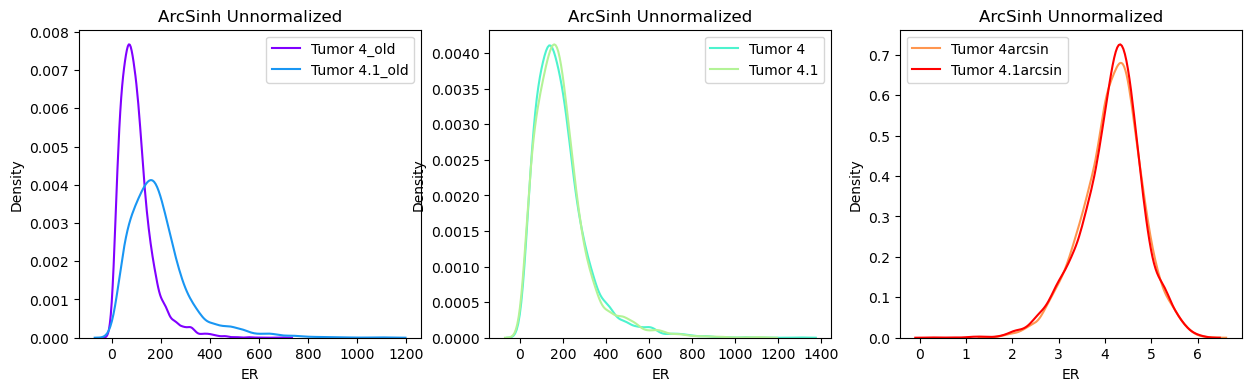

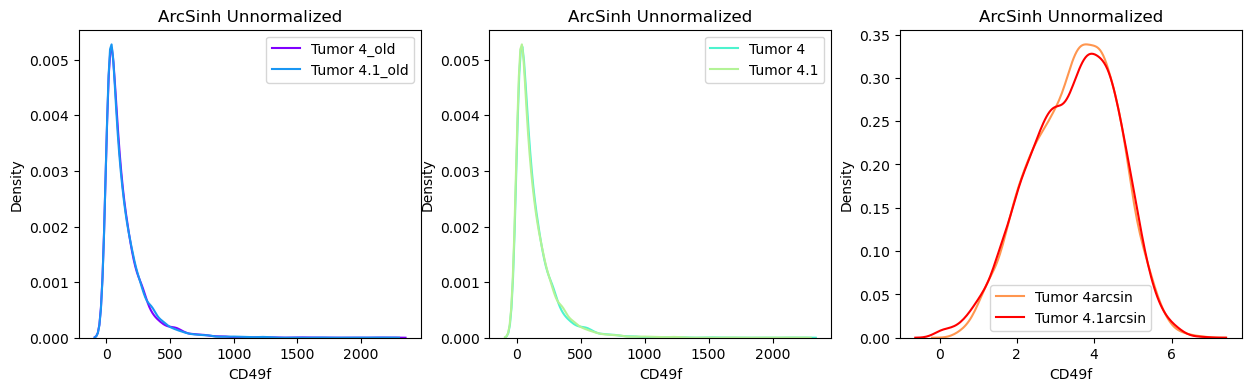

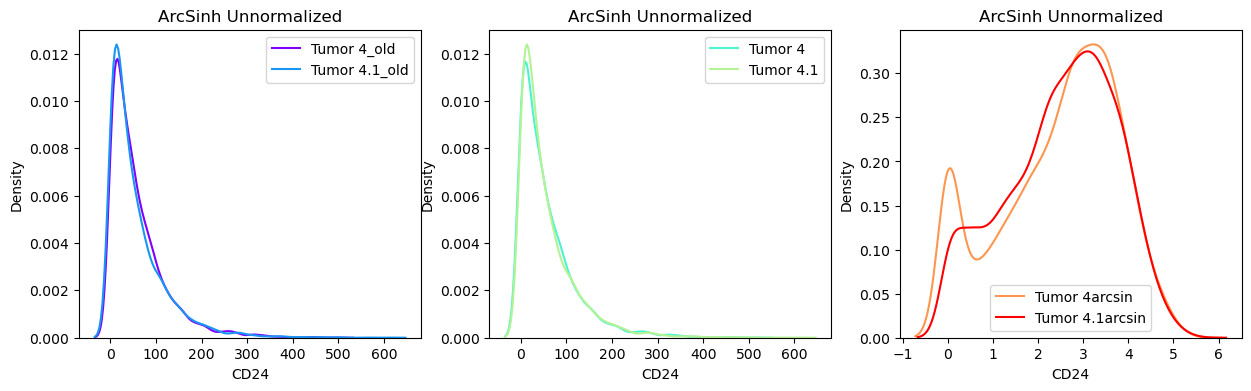

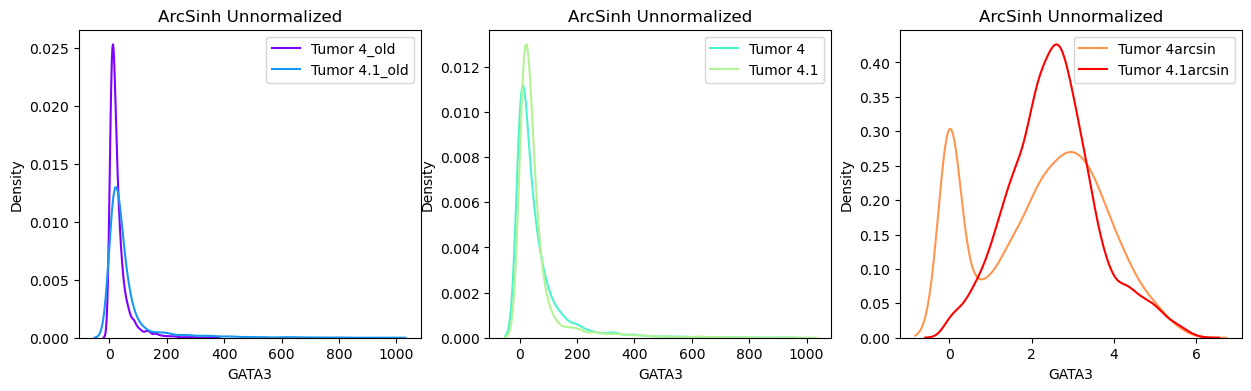

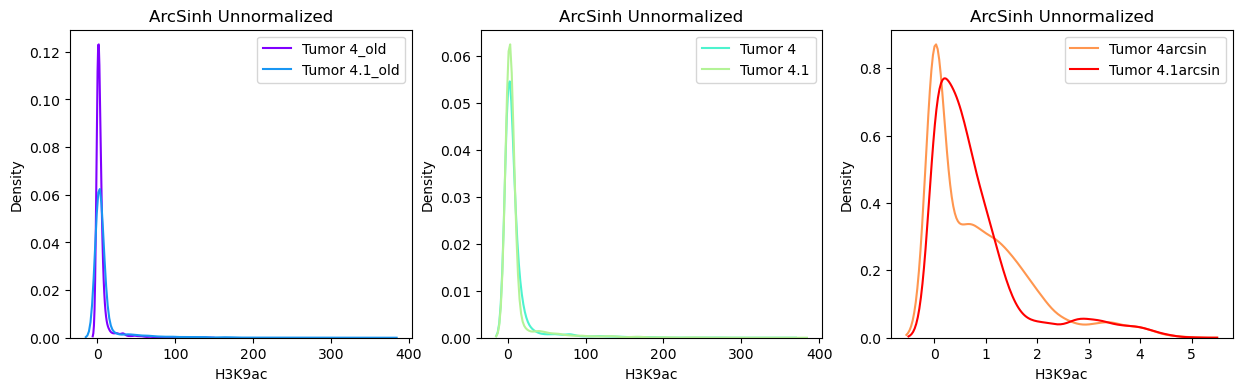

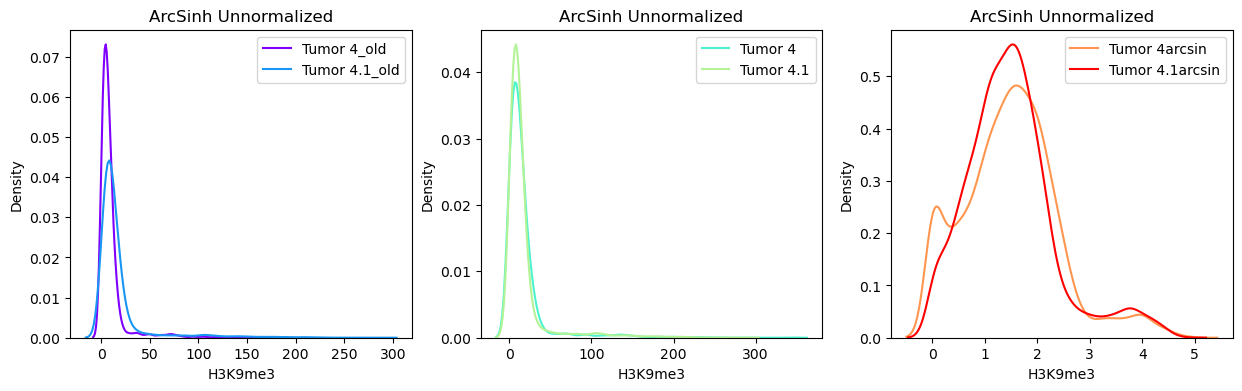

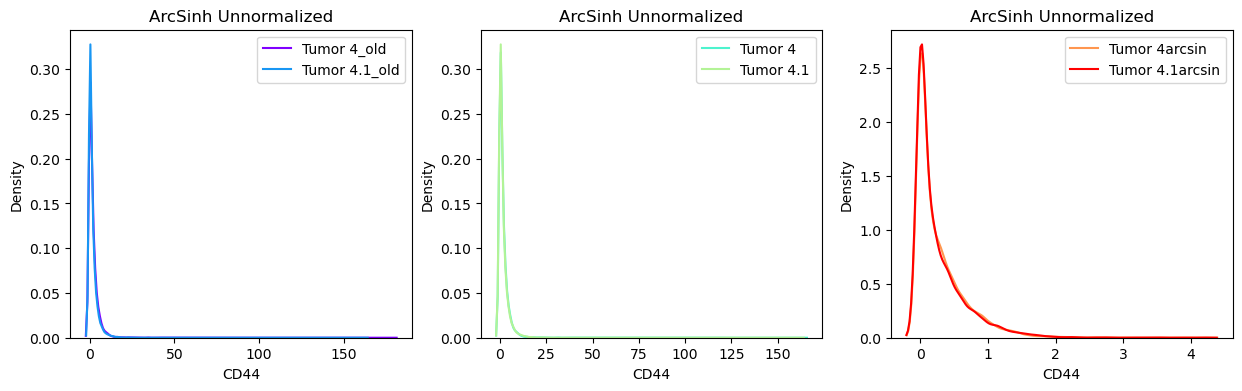

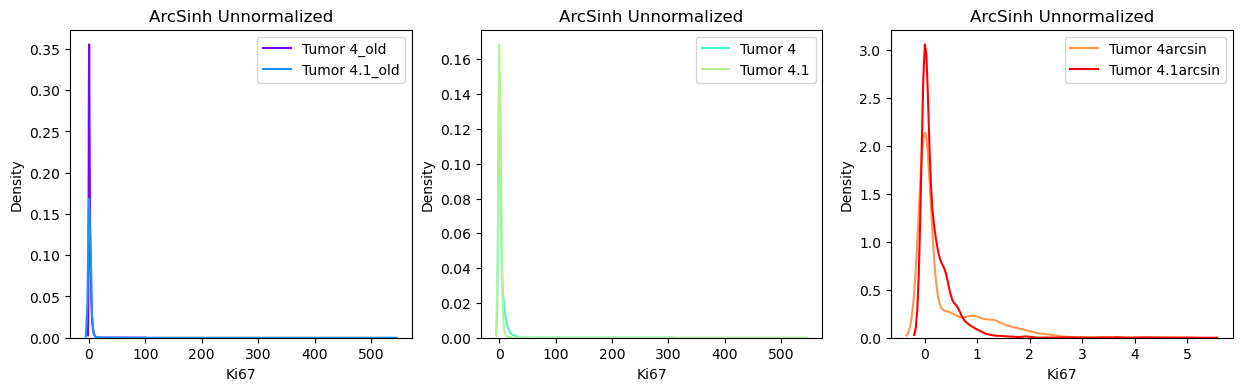

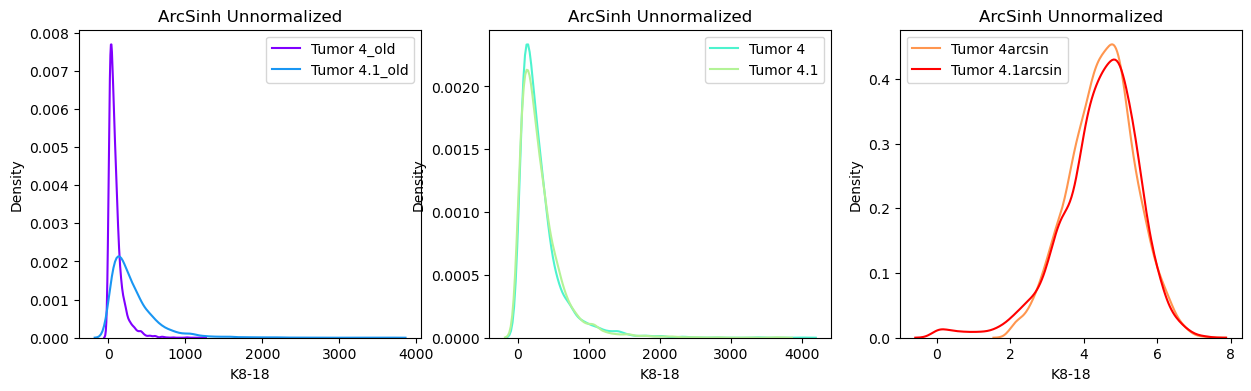

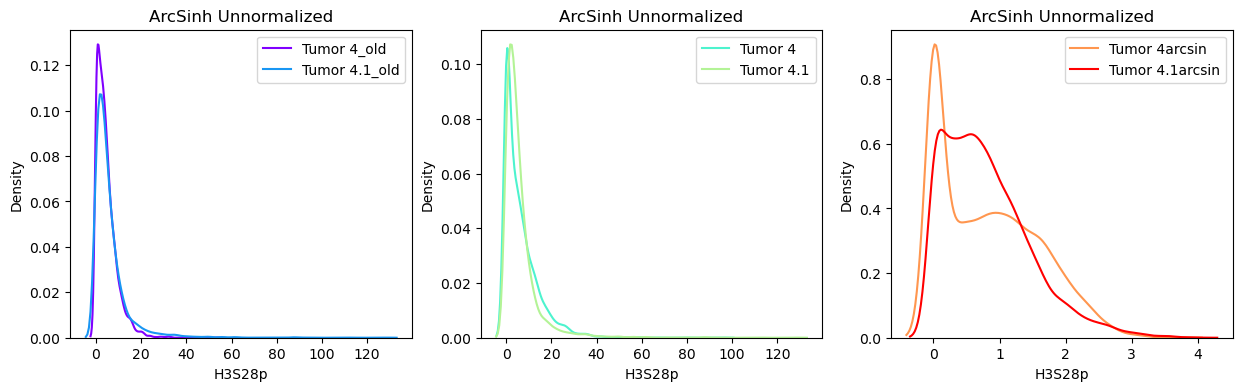

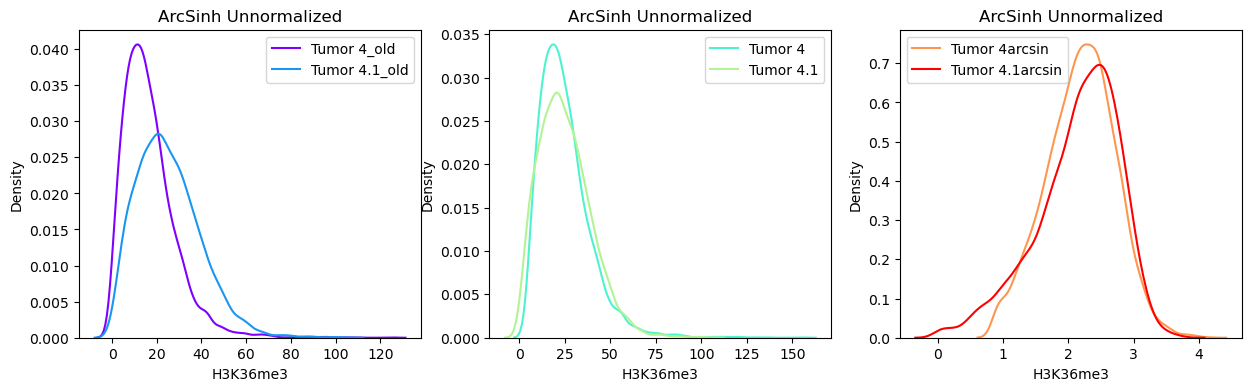

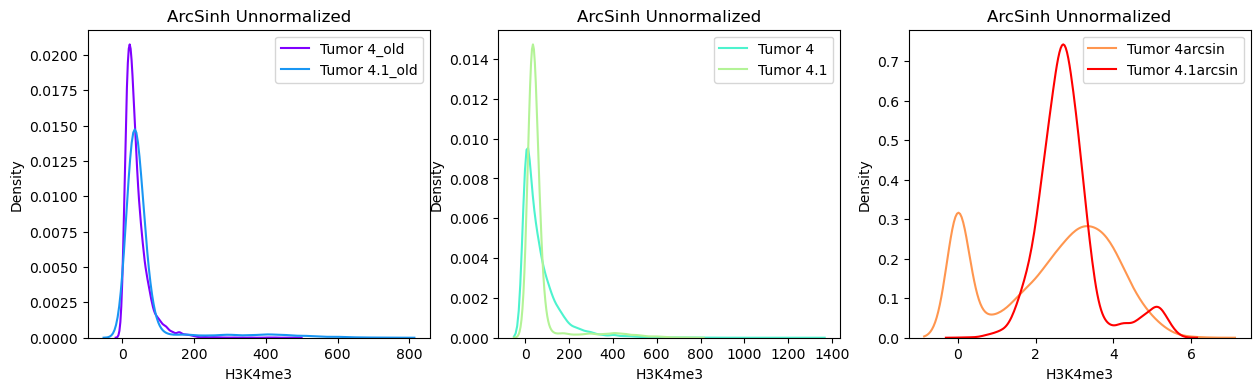

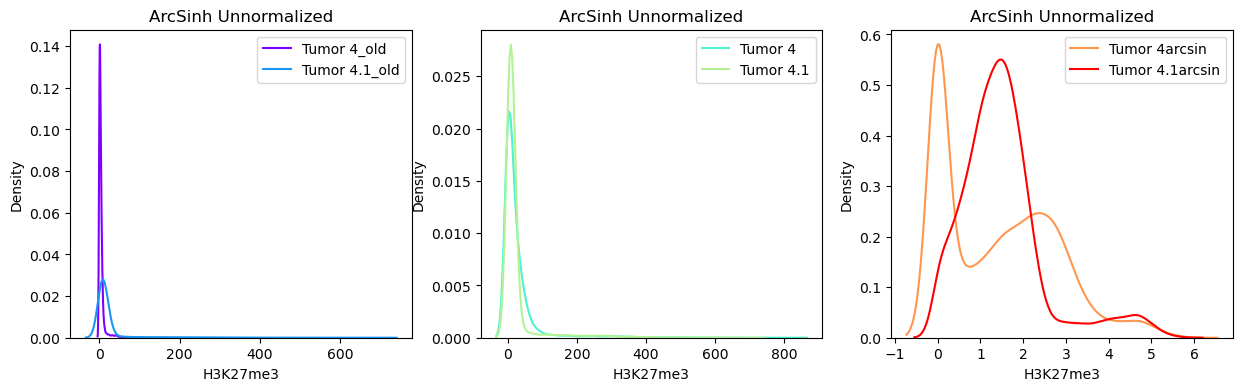

In [4]:
# cols = [names['4']['NamesAll'][0]],
cols = names['4']['NamesAll']
plot_hist(k,cols,[1,1,2,2,3,3],settings,
            func = sns.kdeplot,title = 'ArcSinh Unnormalized',Figname = '1_Hist_ArcSinh_Unnormalized_' ) 